                                `Haberman data analysis`

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('haberman.csv')
df.columns=['Age', 'Year','Nodes','Survival']

In [7]:
df.head()

,Age,Year,Nodes,Survial
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Agenda**:

> Given a Patient with some age year of ops and number of lymph nodes detected we have to conclude the chance wheather the patients will live less than 5 year or *more*


In [8]:
df.shape

(305, 4)

In [9]:
df.isnull().sum()

Age        0
Year       0
Nodes      0
Survial    0
dtype: int64

In [12]:
sum(df.duplicated())

17

Note:We will remove remove the duplicate as it could be genuine possibility

In [13]:
df.Survival.value_counts()

Survial
1    224
2     81
Name: count, dtype: int64

In [43]:
df.Survival=df.Survival.replace([1,2],[0,1])

In [35]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      305 non-null    int64
 1   Year     305 non-null    int64
 2   Nodes    305 non-null    int64
 3   Survial  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


 Observation:

*   Seems everything have correct datatype

*   Size of the file is 9.7 KB




In [27]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


 Observation:

*   Maximum age is 83 yo and minimum age is 30 yo

*   Most of the testing performed on 1969
* Nodes column has high diff between 75% and max values indicating right skewed.
*  Survival has range from 0 to 1.





##Univariate Analysis
1. Survival


<Axes: xlabel='Survival', ylabel='count'>

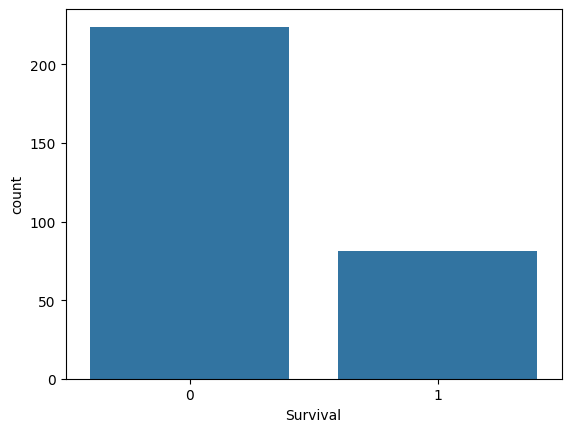

In [46]:
sns.countplot(x='Survival',data=df)

Observation:

There are 27% of people who lives less than 5 year, indicating dataset is imbalanced

2.Age

In [48]:
df['Age'].describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

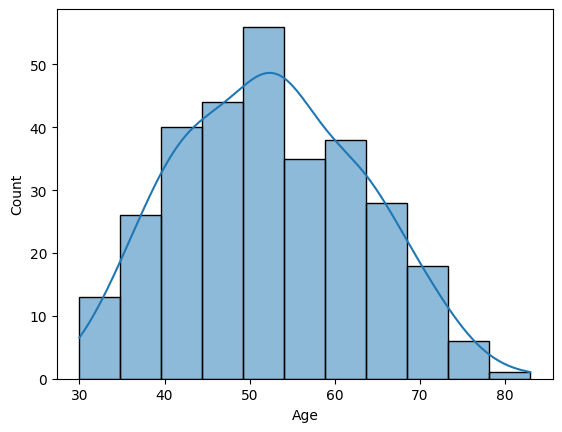

In [49]:
sns.histplot(x='Age',data=df,kde=True)

Observation:

Maximum who were operated were age group of 50-55

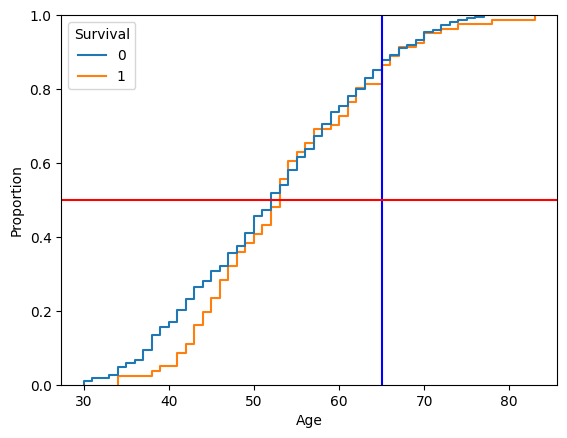

In [52]:
sns.ecdfplot(x='Age',data=df,hue='Survival')
plt.axvline(65,color='b')
plt.axhline(.5,color='r')

Observation:

* 80% of the people were 65 years or below
*  50% of the people are 50 or below

3. Operation Year

<Axes: xlabel='Year'>

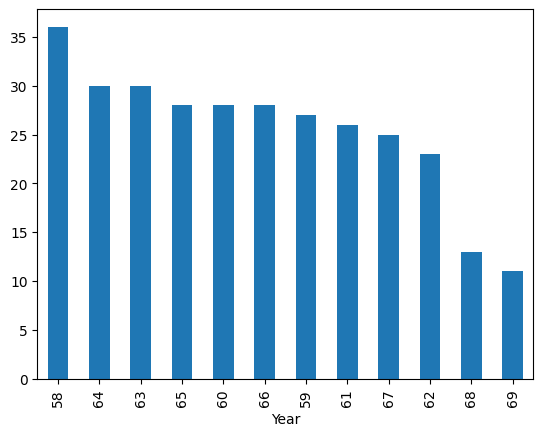

In [54]:
df['Year'].value_counts().plot(kind='bar')

Observation:

Maximum operation [35] were performed in year 1958 and continuous decreasing



4.Lymph

<Axes: xlabel='Nodes', ylabel='Count'>

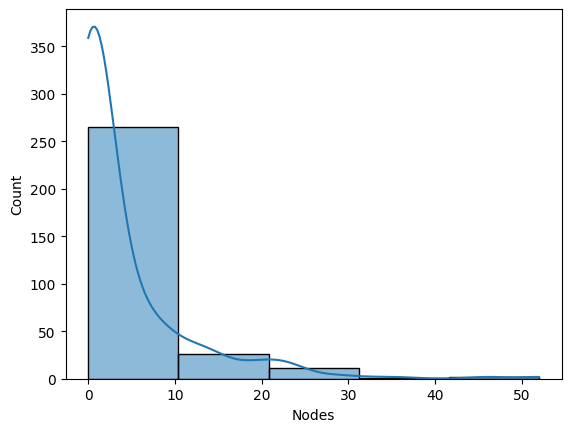

In [62]:
# df['Nodes'].value_counts().plot(kind='bar')
sns.histplot(x='Nodes', data=df,kde=True,binwidth=10)

Observation:

Maximum Density count for nodes is between 0 and 10

##Bivariate Analysis
* Age -Survival
* Age-Nodes
* Year-Nodes
* Age-Years
* Year-Survival
* Node-Survival



<Axes: xlabel='Survival', ylabel='Age'>

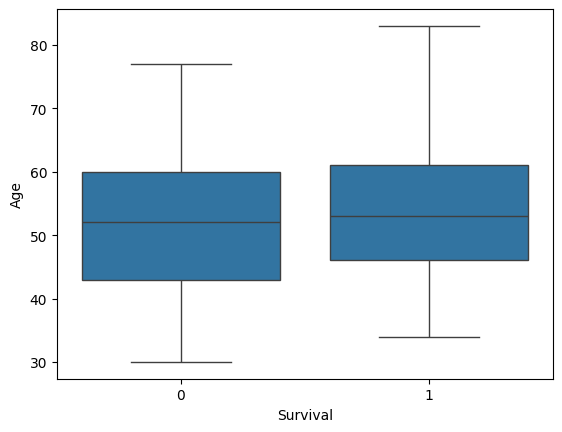

In [64]:
sns.boxplot(y='Age',x='Survival',data=df)

Observation:

* People with Age greater than 77 will live less than 5 year

* People with age less than 35 will live more than 5 year

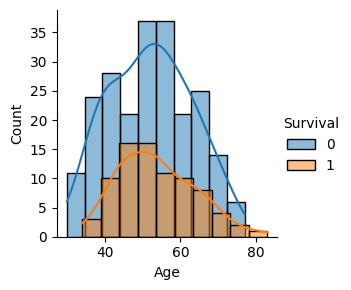

In [71]:
sns.FacetGrid(df, hue='Survival').map(sns.histplot,'Age', bins=10, kde=True).add_legend()

Observation:

* Maximum % of people less than 5 year are between 45 year to 55 year
* People age from 30 to 35 are surviving more
* people with age>76 will live live lesser than 5 year

In [79]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

In [81]:
df['Age'].value_counts()

Age
52    14
54    13
50    12
57    11
53    11
47    11
43    11
55    10
41    10
65    10
49    10
38    10
42     9
45     9
61     9
63     8
59     8
56     7
62     7
58     7
34     7
70     7
48     7
46     7
44     7
37     6
51     6
60     6
39     6
67     6
64     5
66     5
72     4
69     4
40     3
73     2
74     2
30     2
68     2
31     2
36     2
35     2
33     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

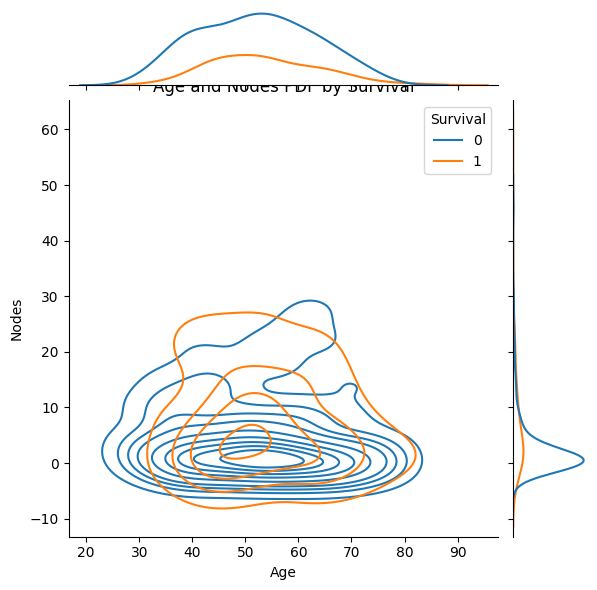

In [82]:
sns.jointplot(x='Age',y='Nodes',data=df,hue='Survival',kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show()

<Axes: xlabel='Survival', ylabel='Nodes'>

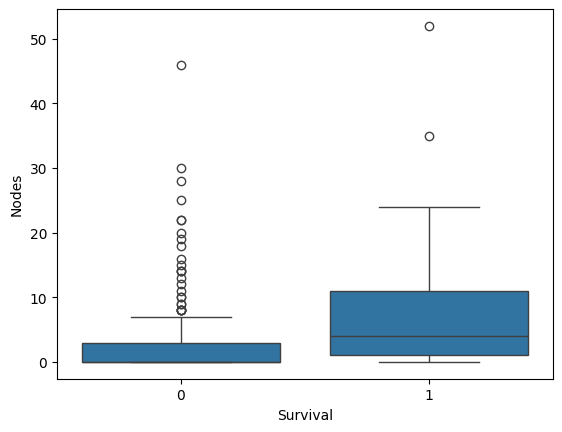

In [83]:
sns.boxplot(x='Survival',y='Nodes',data=df)

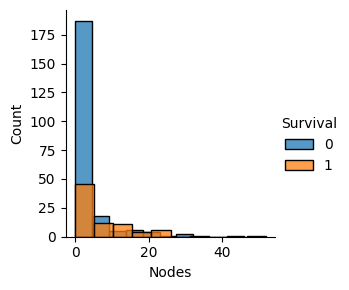

In [85]:
sns.FacetGrid(df, hue='Survival').map(sns.histplot,'Nodes', bins=10, kde=False).add_legend()

Observation:

People with nodes > 7 will live lesser than 5 years

In [90]:
# 1-> living lesser than 5year
df.groupby('Nodes')['Survival'].sum().value_counts(ascending=False)

Survival
1     10
0      6
3      4
2      4
4      3
19     1
8      1
5      1
7      1
Name: count, dtype: int64

In [88]:
df.Nodes.value_counts(ascending=False)

Nodes
0     136
1      40
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64

In [92]:
print('0:',6/136)
print('1',10/40)
print('2:',4/20)
print('3:',4/20)
print('4:',3/13)
print('5:',1/6)
print('7:',1/7)
print('8:',1/7)

0: 0.04411764705882353
1 0.25
2: 0.2
3: 0.2
4: 0.23076923076923078
5: 0.16666666666666666
7: 0.14285714285714285
8: 0.14285714285714285


Survival vs Year

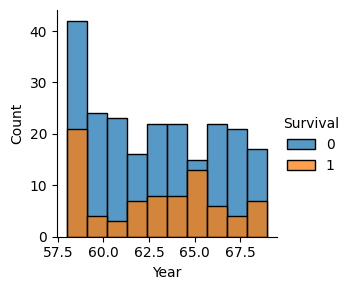

In [99]:
sns.FacetGrid(df, hue='Survival').map(sns.histplot,'Year', bins=10, kde=False).add_legend()

In [97]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


In year 1965:
13/28= 46% people were died.


Age vs Year

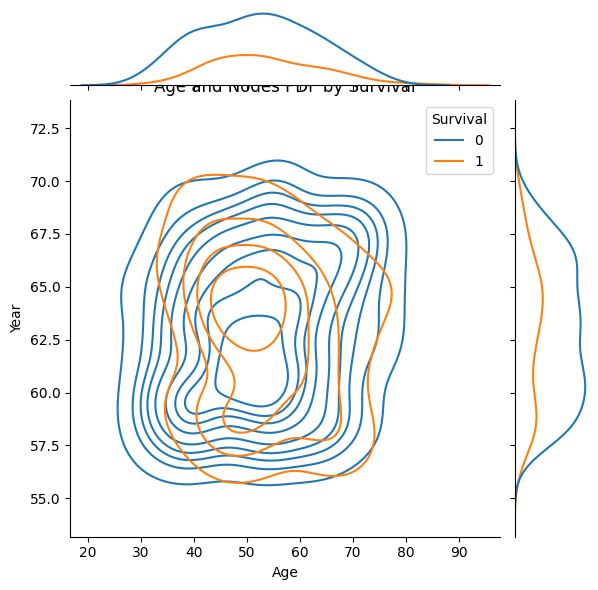

In [101]:
sns.jointplot(x='Age',y='Year',data=df,hue='Survival',kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show()

## Multivariate Analysis

<Axes: >

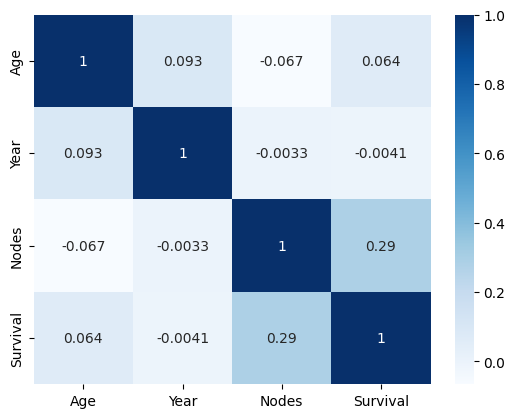

In [103]:
corr= df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

Nodes and Survival are corelated by 29 %

# **Thank You**